In [2]:
pip install geopandas

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [12]:
print (pd.__version__)

1.0.1


In [14]:
pip install --upgrade pandas

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd

In [17]:
print (pd.__version__)

1.0.1


In [18]:
pip install geopy

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install keras

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tensorflow

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
#%load_ext autotime

import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

import math
import geopy
from geopy import distance

from geopy.distance import geodesic

from pyproj import Transformer
from shapely import geometry
from shapely.geometry import Point

from keras.models import Sequential
from keras.layers import Dense

In [3]:
df_cells= pd.read_csv("cells_20210401_20210414_new.csv")

In [4]:
df_mdt= pd.read_csv("mdt_raw_data_20210401_20210414_filtered_grid_new.csv")

In [5]:
df_cells

,cell_name,cell_lon,cell_lat,cell_azimuth
0,3rd_Cross_St-CM0669-H_A,79.852878,6.937347,210.0
1,3rd_Cross_St-CM0669-H_B,79.852878,6.937347,320.0
2,AASL-GM0001-B_A,79.890556,7.177222,5.0
3,AASL-GM0001-B_B,79.890556,7.177222,210.0
4,AASL-GM0001-B_C,79.890556,7.177222,260.0
...,...,...,...,...
1125,Welihena-GM0180-H_2C,79.864444,7.250000,350.0
1126,Welihena-GM0180-H_2U,79.864444,7.250000,40.0
1127,Welihena-GM0180-H_3C,79.864444,7.250000,350.0
1128,Welihena-GM0180-H_4C,79.864444,7.250000,350.0


In [6]:
# df_cells= pd.read_csv("/content/drive/MyDrive/Data Sets/CSV/GM_cells_20210401_20210414.csv")
# df_cells

In [7]:
df_mdt

,cell_name,lon,lat,rsrp,count,x,y,gx,gy
0,AASL-GM0001-B_A,79.858154,7.189167,-109.0,9,373925.269560,794817.938691,373920,794820
1,Kurana-GM0031-H_4D,79.858154,7.189167,-95.0,9,373925.269560,794817.938691,373920,794820
2,Kurana-GM0031-H_4D,79.858154,7.189167,-91.0,9,373925.269560,794817.938691,373920,794820
3,Kurana-GM0031-H_4D,79.858154,7.189167,-90.0,9,373925.269560,794817.938691,373920,794820
4,Kurana-GM0031-H_A,79.858154,7.189167,-94.0,1444,373925.269560,794817.938691,373920,794820
...,...,...,...,...,...,...,...,...,...
892434,Welihena-GM0180-H_2B,79.866856,7.238989,-101.0,9,374899.889870,800324.301339,374900,800320
892435,Welihena-GM0180-H_2B,79.871933,7.241867,-102.0,9,375461.255698,800641.123620,375460,800640
892436,Welihena-GM0180-H_2C,79.861961,7.249601,-90.0,49,374362.347628,801499.009112,374360,801500
892437,Welihena-GM0180-H_4C,79.859786,7.247443,-112.0,16,374121.601096,801261.003670,374120,801260


In [8]:
df_mdt['count'].min()

9

In [9]:
#common functions

def from_normalized(x_normalized,max_x,min_x):
    return x_normalized*(max_x-min_x)+min_x

def get_bearing(reference, destination):
  lat1 = math.radians(reference[0])
  lat2 = math.radians(destination[0])
  diffLong = math.radians(destination[1] - reference[1])
  x = math.sin(diffLong) * math.cos(lat2)
  y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(diffLong))
  initial_bearing = math.atan2(x, y)
  initial_bearing = math.degrees(initial_bearing)
  compass_bearing = (initial_bearing + 360) % 360
  return compass_bearing

# we are calculating the bearing to every datapoint from the cell center
def insert_bearing_and_distance_to_dataframe(row,cell_lon,cell_lat):
#   row['bearing'] = get_bearing((cell_lat, cell_lon), (row['lat'], row['lon']))
  row['distance'] = distance.distance((cell_lat, cell_lon), (row['lat'], row['lon'])).km
  return row


def plot_df(df,cell="",marker_size=5):
    df=df.reset_index()
    
    if ('rsrp' in df.columns)!=True:
        df['rsrp']=-1
        
    geom = [Point(xy) for xy in zip(df.gx, df.gy)]
    df_mdt_cell = df.drop(['gx', 'gy'], axis=1)
    mdt_gdf = gpd.GeoDataFrame(df_mdt_cell, crs="EPSG:32644", geometry=geom)

    
    vmin, vmax = np.min(df["rsrp"]), np.max(df["rsrp"])
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 10)
    # ax=ax[1]
    divider = make_axes_locatable(ax)

    #viridis
    if (vmin!=vmax):
        cax = divider.append_axes("right", size="5%", pad=.1)
        mdt_gdf.plot(column='rsrp', cmap='hot', vmin=vmin, vmax=vmax,markersize=marker_size,marker="s",ax=ax,legend=True, cax=cax)
    else: 
        mdt_gdf.plot(column='rsrp', cmap='hot', vmin=vmin, vmax=vmax,markersize=marker_size,marker="s",ax=ax,legend=False)

    if cell!="":
        cell_df=df_cells[df_cells["cell_name"]==cell].reset_index()
        df_bts=pd.DataFrame()
        geometry = [Point(xy) for xy in zip([cell_df.loc[0,"cell_lon"]],[cell_df.loc[0,"cell_lat"]])]
        gdf_bts = gpd.GeoDataFrame(df_bts, crs="EPSG:4326", geometry=geometry)
        gdf_bts.to_crs(crs="epsg:32644" , inplace= True )
        gdf_bts.plot(markersize=100,color='red',edgecolor='white',ax=ax)
    plt.show()
    
def get_point_from_bearing(lat1, lon1,bearing,distance):
    # given: lat1, lon1, b = bearing in degrees, d = distance in kilometers
    origin = geopy.Point(lat1, lon1)
    destination = geodesic(kilometers=distance).destination(origin, bearing)
    return destination.latitude, destination.longitude

def custom_round(x, base=20):
    return base * round(x/base)

def normalize_col(col):
    return (col-min(col))/(max(col)-min(col))

In [10]:
cell_names=df_cells['cell_name'].to_list()

In [11]:
cell_names= ['AASL-GM0001-H_1A','AASL-GM0001-H_1B','AASL-GM0001-H_1C','AASL-GM0001-H_1U','AASL-GM0001-H_1W','AASL-GM0001-H_2A','AASL-GM0001-H_2B','AASL-GM0001-H_2C','AASL-GM0001-H_2U','AASL-GM0001-H_2W','AASL-GM0001-H_3B','AASL-GM0001-H_4B',]

3.4072204266885153
Epoch 1/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0099 - accuracy: 0.9752
Epoch 2/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0076 - accuracy: 0.9740
Epoch 3/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0070 - accuracy: 0.9738
Epoch 4/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0069 - accuracy: 0.9738
Epoch 5/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0066 - accuracy: 0.9739
Epoch 6/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0065 - accuracy: 0.9740
Epoch 7/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0066 - accuracy: 0.9741
Epoch 8/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0064 - accuracy: 0.9740
Epoch 9/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0063 - accuracy: 0.9739
Epoch 10/20
2529/2529 [==============================] - 4s 1ms

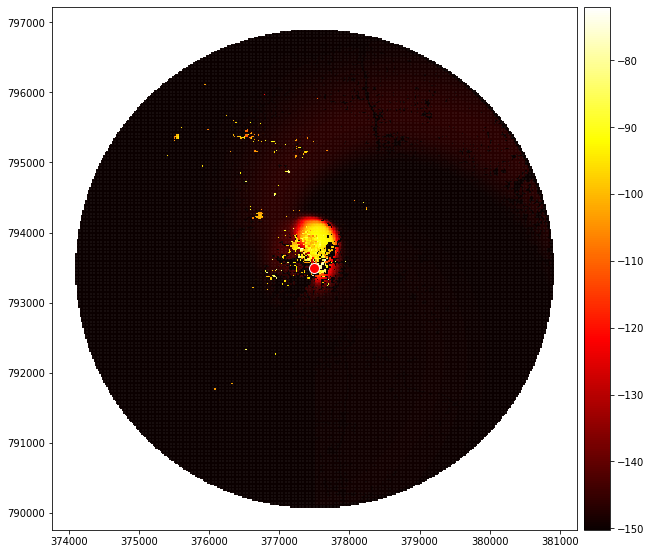

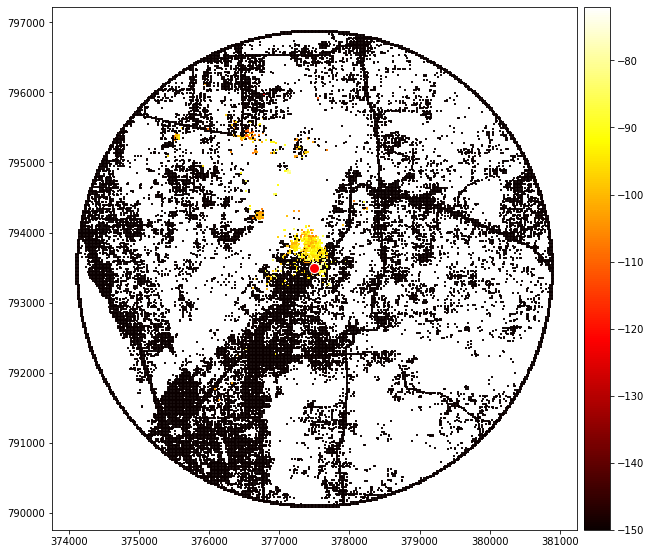

cell name:  AASL-GM0001-H_1A
3.498123046259285
Epoch 1/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0102 - accuracy: 0.9797
Epoch 2/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0093 - accuracy: 0.9797
Epoch 3/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0092 - accuracy: 0.9797
Epoch 4/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 5/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 6/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 7/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 8/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 9/20
2640/2640 [==============================] - 4s 1ms/step - loss: 0.0091 - accuracy: 0.9797
Epoch 10/20
2640/2640 [============

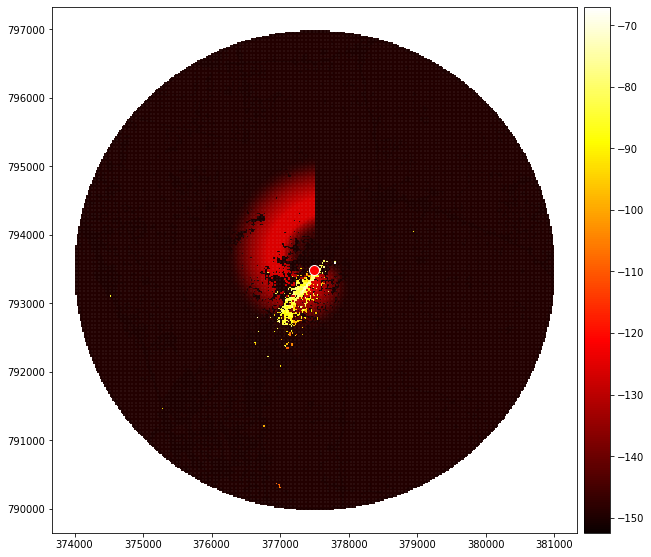

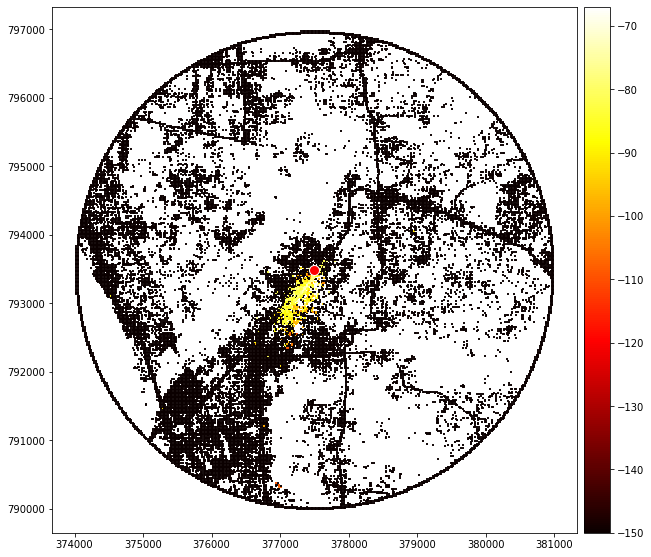

cell name:  AASL-GM0001-H_1B


In [12]:
for cell_name in cell_names[:2]:

  # Take Cell Locations
  cell_lon=df_cells[df_cells["cell_name"]==cell_name].reset_index().loc[0,"cell_lon"]
  cell_lat=df_cells[df_cells["cell_name"]==cell_name].reset_index().loc[0,"cell_lat"]

  # Cell Location in Meters
  transformer4326to32644 = Transformer.from_crs("epsg:4326", "epsg:32644")
  point = geometry.point.Point(transformer4326to32644.transform(cell_lat, cell_lon ))
  cell_x,cell_y=point.x,point.y
  

  # Filter the columns which we need
  df1=df_mdt[df_mdt["cell_name"]==cell_name].reset_index().drop(["index"],axis=1)
  df1= df1[["gx","gy","lon","lat","rsrp","x","y"]]
  

  # Group by gx and gy
  df2= df1.groupby(["gx","gy"]).mean("rsrp").reset_index()


  # calculate distanbce of selected points and cells
  df2=df2.apply(lambda row: insert_bearing_and_distance_to_dataframe(row,cell_lon,cell_lat), axis=1)


  # Find min max points of longitude and latitude points
  max_r=max(df2["distance"]) #radius in km
  print(max_r)
  _,min_lon=get_point_from_bearing(cell_lat, cell_lon,270,max_r)
  max_lat,_=get_point_from_bearing(cell_lat, cell_lon,0,max_r)
  _,max_lon=get_point_from_bearing(cell_lat, cell_lon,90,max_r)
  min_lat,_=get_point_from_bearing(cell_lat, cell_lon,180,max_r)
  #0.0001° = 11.1 m
  min_lon-=0.0002
  max_lat+=0.0002
  max_lon+=0.0002
  min_lat-=0.0002
  #print(min_lon,max_lat,max_lon,min_lat)


  df_limits = pd.DataFrame({'point':['min','max'],'lat':[min_lat,max_lat],'lon':[min_lon,max_lon]})

  geom = [Point(xy) for xy in zip(df_limits.lon, df_limits.lat)]
  gdf_limits = gpd.GeoDataFrame(df_limits, crs="EPSG:4326", geometry=geom)
  gdf_limits.to_crs(crs="epsg:32644" , inplace= True )
  df_limits['x']=gdf_limits['geometry'].x
  df_limits['y']=gdf_limits['geometry'].y
  df_limits['gx']=df_limits['x'].apply(custom_round)
  df_limits['gy']=df_limits['y'].apply(custom_round)

  minx=df_limits[df_limits['point']=='min']['gx'][0]
  miny=df_limits[df_limits['point']=='min']['gy'][0]
  maxx=df_limits[df_limits['point']=='max']['gx'][1]
  maxy=df_limits[df_limits['point']=='max']['gy'][1]
  #print(df_limits)


  # Take all points of covering in 20 meters points.
  all_list = []
  for x in range(minx, maxx+1,20):
      for y in range(miny, maxy+1,20):
          all_list.append([x,y]) 

  df_all_points=pd.DataFrame(all_list,columns=["x","y"])


  # Merge gx gy values with that points
  df3=df_all_points.merge(df2,left_on=['x','y'],right_on=['gx','gy'], how='left')
  df3=df3[["x_x","y_x","rsrp"]].reset_index().drop(["index"],axis=1)
  df3.columns=["gx","gy","rsrp_before"]


  # Take meter values of that lon lat points
  geom = [Point(xy) for xy in zip(df3.gx, df3.gy)]
  df4 = gpd.GeoDataFrame(df3, crs="EPSG:32644", geometry=geom)
  df4.to_crs(crs="epsg:4326" , inplace= True )
  df3['lon']=df4['geometry'].x
  df3['lat']=df4['geometry'].y
  df3.drop('geometry', axis=1,inplace=True)



  # Define Methods to find cartician distance, angle 
  import math
  def cartician_distance(x1,y1,x2,y2):
  #     return math.sqrt(math.pow(x1-x2,2)+math.pow(y1-y2,2)) #2.25 ms 
      return ((x1-x2)**2+(y1-y2)**2)**0.5

  def cartician_angle(x,y,center_x,center_y):
      delta_x = x - center_x
      delta_y = y - center_y
      theta_radians = math.atan2(delta_x, delta_y)
      return theta_radians


  def apply_cartician_dist_andgle(row,center_x,center_y):
      row["distance"]=cartician_distance(row["gx"],row["gy"],center_x,center_y)
      row["angle_rad"]=cartician_angle(row["gx"],row["gy"],center_x,center_y)
      return row

  df4 = df3.apply(lambda row: apply_cartician_dist_andgle(row,cell_x,cell_y), axis=1)
  

  #Take all angle to 1 scale
  def convert_to_single_scale(row):
    if(row['angle_rad']<0):
      row['angle_rad']=row['angle_rad']+6.28319
    return row  

  df4 = df4.apply(lambda row: convert_to_single_scale(row), axis=1) 

  #Rotate Points by 180 Degrees , 
  dx=df_cells[df_cells['cell_name']==cell_name][['cell_name','cell_lon','cell_lat','cell_azimuth'	]]
  dx=dx.reset_index()
  cell_azimuth = math.radians(dx['cell_azimuth'][0])

  def rotate_angle(row):
    if(row['angle_rad'] + 3.14159 < 6.28319):
      row['angle_rad']=row['angle_rad']+ 3.14159
    else:
      row['angle_rad']=row['angle_rad']+ 3.14159-6.28319
    return row  



  if ( dx['cell_azimuth'][0]<60 or dx['cell_azimuth'][0]>300 ):
    df4 = df4.apply(lambda row: rotate_angle(row), axis=1) 


  ###### Replace with RSRP Values  ######
  df5=df4[df4["distance"]<=max_r*1000].reset_index().drop(["index"],axis=1)
  df5["gx"]=df5["gx"].astype('int64')
  df5["gy"]=df5["gy"].astype('int64')


  #detecting zero coverage areas using other cells' mdt points
  arr_with_other_mdt=~df5.merge(df_mdt[df_mdt["count"]>10], on=['gx','gy'], how='left').groupby(['gx','gy']).mean().reset_index()["rsrp"].isna()

  df5["rsrp"] = np.where(arr_with_other_mdt, -150,np.nan)


  #current cell data
  df5["rsrp"] = np.where(df5["rsrp_before"].isna(),df5["rsrp"], df5["rsrp_before"])


  #apply edge
  df5["rsrp"] = np.where(df5["distance"]>(max_r-0.04)*1000, -150, df5["rsrp"])

  # print(df5)


  ### Create Training df
  df_training=df5[~df5["rsrp"].isna()].reset_index().drop(["index"],axis=1)
  #
  df_training["theta_n"]=normalize_col(df_training["angle_rad"])
  df_training["r_n"]=normalize_col(df_training["distance"])
  df_training["rsrp_n"]=normalize_col(df_training["rsrp"])
  df_training


  #ANN
  dataset=df_training[["theta_n","r_n","rsrp_n"]].values
  # first neural network with keras tutorial
  # split into input (X) and output (y) variables
  X = dataset[:,0:2]
  y = dataset[:,2]
  model = Sequential()
  model.add(Dense(2, input_dim=2, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(30, activation='relu'))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 
  #add validation loss
  #hyper parameter tuning tools
  #

  df_pred=df5[df5["rsrp"].isna()].reset_index()

  #print(len(df_pred))
  #check if the predication is needed
  if(len(df_pred)>0):
      model.fit(X, y, epochs=20, batch_size=10) #, validation_split=0.1


##############
  df_pred=df5[df5["rsrp"].isna()].reset_index()

  df_pred=df_pred.drop(["index"],axis=1)
  df_pred["theta_n"]=normalize_col(df_pred["angle_rad"])
  df_pred["r_n"]=normalize_col(df_pred["distance"])
  df_pred["rsrp_n"]=model.predict(df_pred[["theta_n","r_n"]].values)

  rsrp_max=max(df_training["rsrp"])
  rsrp_min=min(df_training["rsrp"])
  #print(rsrp_max,rsrp_min)


  df_pred["rsrp"]=from_normalized(df_pred["rsrp_n"],rsrp_max,rsrp_min)

  df_result=df_training.reset_index().append(df_pred,sort=False)
  #         df_result.drop(["index"],axis=1).to_csv("Result_"+cell_name+".csv",index=False)
  plot_df(df_result,cell=cell_name,marker_size=1) 

  # Unfilled ploted df
  plot_df(df5,cell=cell_name,marker_size=1) 

  print("cell name: ",cell_name)


In [13]:
df5

,gx,gy,rsrp_before,lon,lat,distance,angle_rad,rsrp
0,374020,793140,NaN,79.859050,7.173994,3497.515298,4.612612,-150.0
1,374020,793160,NaN,79.859049,7.174175,3495.579616,4.618305,-150.0
2,374020,793180,NaN,79.859049,7.174355,3493.757353,4.624004,-150.0
3,374020,793200,NaN,79.859048,7.174536,3492.048687,4.629709,-150.0
4,374020,793220,NaN,79.859048,7.174717,3490.453785,4.635419,-150.0
...,...,...,...,...,...,...,...,...
96085,380980,793760,NaN,79.922063,7.179753,3490.463788,1.492909,-150.0
96086,380980,793780,NaN,79.922062,7.179934,3492.076896,1.487199,-150.0
96087,380980,793800,NaN,79.922062,7.180115,3493.803749,1.481494,-150.0
96088,380980,793820,NaN,79.922061,7.180296,3495.644179,1.475796,-150.0


# **Find Predicted Azimuth**



In [14]:
#just copied. edit this after getting correct AISU azimuths
import time
import csv
import pandas as pd
import numpy as np
import math

In [15]:
cell_name="AASL-GM0001-H_1A"

In [16]:
#dis_80= 80% of maximum distance to any mdt point 
#if distance > dis_80 retrun [0 0 0 .... 0 0] 
#else 
def app_power(distance_frm_bts,angle,dis_80,split=1):
    predit_rsrp_for_dif_azimuth=[]
    predit_rsrq_for_dif_azimuth=[]
    
    if (distance_frm_bts<=dis_80):
        predit_rsrq_for_dif_azimuth_temp=np.arange(0,360,2)*0
        temp=np.arange(0,360,2)*0
        predit_rsrq_for_dif_azimuth_temp[0:30]=np.append(np.arange(1,30,2),np.arange(29,0,-2))
        predit_rsrq_for_dif_azimuth_temp=np.roll(predit_rsrq_for_dif_azimuth_temp,-7)
        index=int(np.round(angle/2))
        
        predit_rsrq_for_dif_azimuth_temp=np.roll(predit_rsrq_for_dif_azimuth_temp,index)
        
        predit_rsrq_for_dif_azimuth=predit_rsrq_for_dif_azimuth_temp*(dis_80-distance_frm_bts)
        predit_rsrp_for_dif_azimuth=predit_rsrq_for_dif_azimuth_temp*(dis_80-distance_frm_bts)
            
    else:
        predit_rsrq_for_dif_azimuth=np.arange(0,360,2)*0
        predit_rsrp_for_dif_azimuth=np.arange(0,360,2)*0
        
    return predit_rsrp_for_dif_azimuth, predit_rsrq_for_dif_azimuth

In [17]:
#retrurn distance and angle to given point
#check and optimize this:
def angle_distance_func(bts_logitute,bts_latitute,user_latitude,user_longitude):
    
    distance=(np.sqrt(np.square(float(bts_logitute)-user_longitude)+np.square(float(bts_latitute)-user_latitude)))*111000
    if (float(bts_latitute)<user_latitude):
        angle=np.arctan((user_longitude-float(bts_logitute))/(user_latitude-float(bts_latitute)))*180/(np.pi)
        if (angle<0):
            angle=360+angle
    else:

        angle=180+np.arctan((float(bts_logitute)-user_longitude)/(float(bts_latitute)-user_latitude))*180/(np.pi)
  
    if math.isnan(angle) & ((user_longitude-float(bts_logitute))>0):
        angle=90
    elif  math.isnan(angle):
        angle=270
    
    return distance,angle

In [18]:
def calculate_antenna_azimuth_prediction(MDT_longitude,MDT_latitude,bts_logitute,bts_latitute,MDT_rsrp,MDT_rsrq):
    predicted_azimuth_rsrp=[]
    predicted_azimuth_rsrq=[]
    recorded_azimuth=[]

    if MDT_rsrq.size>0:
        n=MDT_rsrq.size

    elif MDT_rsrp.size>0:   
        n=MDT_rsrp.size
    else:
        n=0 


   
    if n>0:
        
        #temp=temp_cell_users.iloc[0,:]
        #angle=angle_func(bts_logitute,bts_latitute,user_latitude,user_longitude)
        [distace,angle]=angle_distance_func(bts_logitute,bts_latitute,MDT_latitude[0],MDT_longitude[0])
        max_dis=0
        
        for idx in np.arange(len(MDT_rsrp)):
            #temp=temp_cell_users.loc[idx]
            [distace,angle]=angle_distance_func(bts_logitute,bts_latitute,MDT_latitude[idx],MDT_longitude[idx])
            max_dis=np.max([max_dis,distace])
        
        dis_80=max_dis*0.8

        [predit_rsrp,predit_rsrq]=app_power(distace,angle,dis_80);
        
        all_data_rsrp=np.zeros((2,np.size(predit_rsrp)))
        all_data_rsrq=np.zeros((2,np.size(predit_rsrq)))
        

        
        for idx in np.arange(len(MDT_rsrp)):
            #temp=temp_cell_users.loc[idx]
            [distace,angle]=angle_distance_func(bts_logitute,bts_latitute,MDT_latitude[idx],MDT_longitude[idx])
            #distace=distance_func(bts_logitute,bts_latitute,user_latitude,user_longitude)
            [predit_rsrp,predit_rsrq]=app_power(distace,angle,dis_80)
            if MDT_rsrq.size>0:
                multiply_val_rsrq=np.float64(predit_rsrq)*MDT_rsrq[idx]
                all_data_rsrq=np.row_stack((all_data_rsrq,multiply_val_rsrq))
            if MDT_rsrp.size>0:
                multiply_val_rsrp=np.float64(predit_rsrp)*MDT_rsrp[idx]
                all_data_rsrp=np.row_stack((all_data_rsrp,multiply_val_rsrp))
            

        T_12_azimuuth=np.linspace(0,358, 180)
     
        #predicted_azimuth_rsrp=np.append(predicted_azimuth_rsrp,T_12_azimuuth[np.where(azimuth_prediction_rsrp==np.max(azimuth_prediction_rsrp))])
        #predicted_azimuth_rsrq=np.append(predicted_azimuth_rsrq,T_12_azimuuth[np.where(azimuth_prediction_rsrq==np.max(azimuth_prediction_rsrq))])
        if MDT_rsrq.size>0:
            azimuth_prediction_rsrq=all_data_rsrq.sum(axis=0)
            predicted_azimuth_rsrq=T_12_azimuuth[np.argmax(azimuth_prediction_rsrq)]
            
        if MDT_rsrp.size>0:
            azimuth_prediction_rsrp=all_data_rsrp.sum(axis=0)
            predicted_azimuth_rsrp=T_12_azimuuth[np.argmax(azimuth_prediction_rsrp)]

    else:
        #azimuth_Bts=node_data_1.loc[node_data_1['global_cellid']==x]
        predicted_azimuth_rsrp=np.NaN
        predicted_azimuth_rsrq=np.NaN
        #recorded_azimuth=np.append(recorded_azimuth,sectors_cell_names_df.azimuth[x])
    return predicted_azimuth_rsrp,predicted_azimuth_rsrq


In [19]:
cell_name

'AASL-GM0001-H_1A'

=====
 =====  AASL-GM0001-H_1C  ==== 
=====


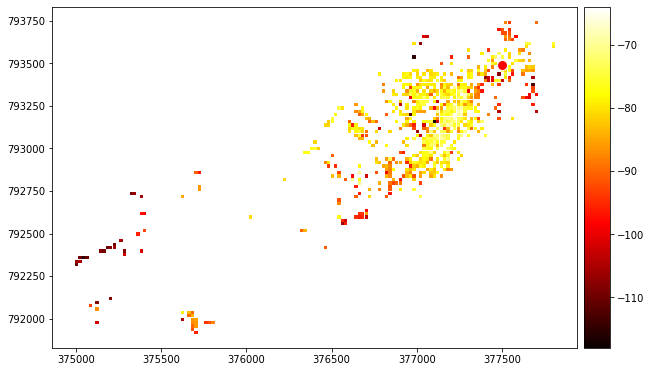

=====
 =====  AASL-GM0001-H_1U  ==== 
=====


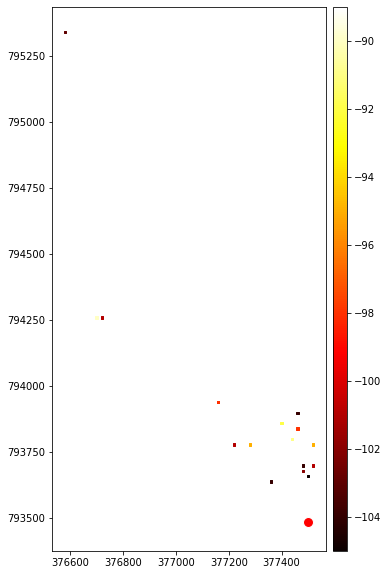

=====
 =====  AASL-GM0001-H_1W  ==== 
=====


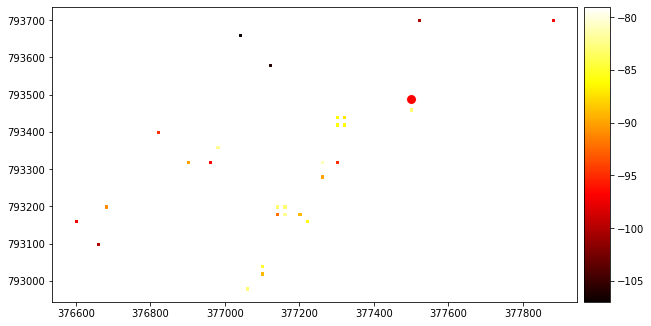

=====
 =====  AASL-GM0001-H_2A  ==== 
=====


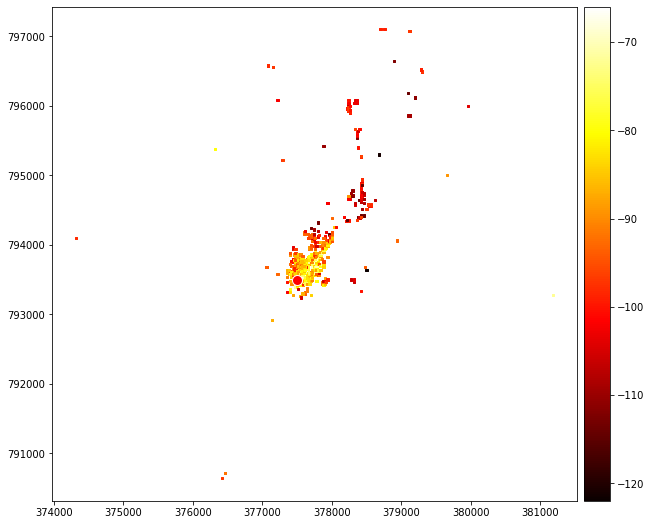

=====
 =====  AASL-GM0001-H_2B  ==== 
=====


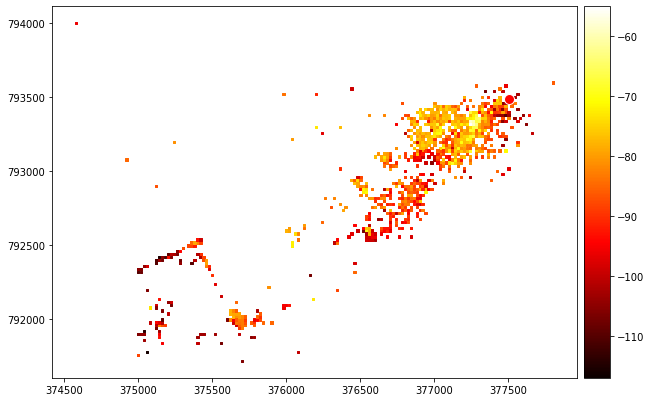

=====
 =====  AASL-GM0001-H_2C  ==== 
=====


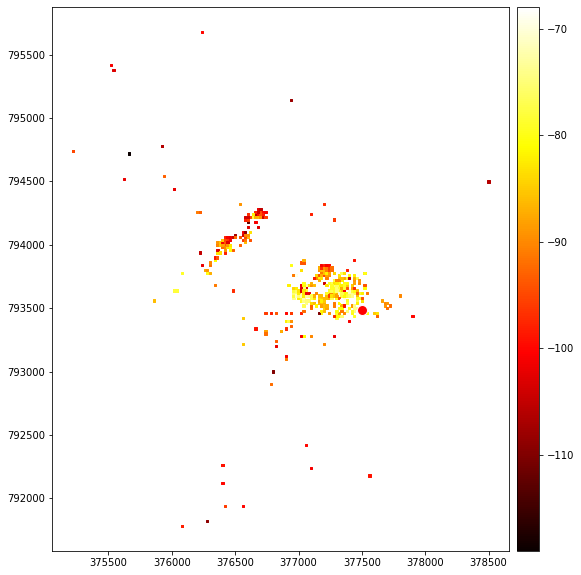

In [20]:
for cell_name in cell_names[2:8]:
  print("=====")
  print(" ===== ",cell_name," ==== ")
  print("=====")
  dfx=df_mdt[df_mdt["cell_name"]==cell_name].reset_index().drop(["index"],axis=1)
  plot_df(dfx,cell=cell_name,marker_size=5) 
  

In [21]:
dfx

,cell_name,lon,lat,rsrp,count,x,y,gx,gy
0,AASL-GM0001-H_2C,79.889156,7.178555,-93.0,64,377345.874755,793636.171199,377340,793640
1,AASL-GM0001-H_2C,79.889156,7.178555,-85.0,9,377345.874755,793636.171199,377340,793640
2,AASL-GM0001-H_2C,79.889337,7.176936,-90.0,16,377365.428729,793457.113769,377360,793460
3,AASL-GM0001-H_2C,79.890425,7.179095,-90.0,9,377486.153323,793695.538345,377480,793700
4,AASL-GM0001-H_2C,79.893326,7.178195,-90.0,9,377806.266247,793595.253209,377800,793600
...,...,...,...,...,...,...,...,...,...
978,AASL-GM0001-H_2C,79.890244,7.178015,-79.0,9,377465.876689,793576.173713,377460,793580
979,AASL-GM0001-H_2C,79.890244,7.178375,-93.0,9,377465.973038,793615.978051,377460,793620
980,AASL-GM0001-H_2C,79.890606,7.178015,-94.0,9,377505.851928,793576.076969,377500,793580
981,AASL-GM0001-H_2C,79.891150,7.165425,-99.0,121,377562.561446,792183.886287,377560,792180


In [22]:
# for cell_name in cell_names[2:30:2]:


#   #df1=df_mdt[df_mdt['cell_name']=cell_name]
#   df1=df_mdt[df_mdt["cell_name"]==cell_name].reset_index().drop(["index"],axis=1)
#   df11=df_cells[df_cells["cell_name"]==cell_name].reset_index().drop(["index"],axis=1)

#   import matplotlib.pyplot as plt
#   plt.scatter(x=df1['lon'], y=df1['lat'],c='blue')
#   plt.scatter(x=df11['cell_lon'], y=df11['cell_lat'],c='red')
#   plt.show()
#   print(cell_name)


In [23]:

df_mdt

,cell_name,lon,lat,rsrp,count,x,y,gx,gy
0,AASL-GM0001-B_A,79.858154,7.189167,-109.0,9,373925.269560,794817.938691,373920,794820
1,Kurana-GM0031-H_4D,79.858154,7.189167,-95.0,9,373925.269560,794817.938691,373920,794820
2,Kurana-GM0031-H_4D,79.858154,7.189167,-91.0,9,373925.269560,794817.938691,373920,794820
3,Kurana-GM0031-H_4D,79.858154,7.189167,-90.0,9,373925.269560,794817.938691,373920,794820
4,Kurana-GM0031-H_A,79.858154,7.189167,-94.0,1444,373925.269560,794817.938691,373920,794820
...,...,...,...,...,...,...,...,...,...
892434,Welihena-GM0180-H_2B,79.866856,7.238989,-101.0,9,374899.889870,800324.301339,374900,800320
892435,Welihena-GM0180-H_2B,79.871933,7.241867,-102.0,9,375461.255698,800641.123620,375460,800640
892436,Welihena-GM0180-H_2C,79.861961,7.249601,-90.0,49,374362.347628,801499.009112,374360,801500
892437,Welihena-GM0180-H_4C,79.859786,7.247443,-112.0,16,374121.601096,801261.003670,374120,801260


In [24]:
for cell_name in cell_names[:8]:


    df1=df_mdt[df_mdt["cell_name"]==cell_name]
    user_latitude=df1["lat"].to_numpy()
    user_longitude=df1["lon"].to_numpy()
    MDT_rsrp=df1["rsrp"].to_numpy()

    
    df2=df_cells[df_cells["cell_name"]==cell_name]

    known_az= df2['cell_azimuth'].to_numpy()[0]

    bts_logitute=df2["cell_lon"].to_numpy()[0]
    bts_latitude=df2["cell_lat"].to_numpy()[0]


    [predic_rsrp_t, predic_rsrq_t]=calculate_antenna_azimuth_prediction(user_longitude,user_latitude,bts_logitute,bts_latitude,MDT_rsrp+140,np.array([]))
    print(cell_name, " -> " , known_az," Predicted Azimuth --> ",predic_rsrp_t)
    


AASL-GM0001-H_1A  ->  5.0  Predicted Azimuth -->  10.0
AASL-GM0001-H_1B  ->  230.0  Predicted Azimuth -->  226.0
AASL-GM0001-H_1C  ->  260.0  Predicted Azimuth -->  240.0
AASL-GM0001-H_1U  ->  5.0  Predicted Azimuth -->  10.0
AASL-GM0001-H_1W  ->  260.0  Predicted Azimuth -->  264.0
AASL-GM0001-H_2A  ->  5.0  Predicted Azimuth -->  58.0
AASL-GM0001-H_2B  ->  230.0  Predicted Azimuth -->  248.0
AASL-GM0001-H_2C  ->  260.0  Predicted Azimuth -->  322.0


In [25]:
final_df = pd.DataFrame(columns = ['Cell Name', 'Raw Data Azim', 'Predicted Azimuth'])

l1 = ["cell1","az1","az2"]
l2 = ["cell2","az2","az3"]
l3 = ["cell3","az3","az4"]

df_length = len(final_df)
final_df.loc[df_length] = l1
df_length = len(final_df)
final_df.loc[df_length] = l2
df_length = len(final_df)
final_df.loc[df_length] = l3


final_df


,Cell Name,Raw Data Azim,Predicted Azimuth
0,cell1,az1,az2
1,cell2,az2,az3
2,cell3,az3,az4


3.4072204266885153
Epoch 1/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0087 - accuracy: 0.9748
Epoch 2/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0064 - accuracy: 0.9741
Epoch 3/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0062 - accuracy: 0.9738
Epoch 4/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0061 - accuracy: 0.9737
Epoch 5/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0060 - accuracy: 0.9738
Epoch 6/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0060 - accuracy: 0.9737
Epoch 7/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0059 - accuracy: 0.9737
Epoch 8/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0060 - accuracy: 0.9735
Epoch 9/20
2529/2529 [==============================] - 4s 1ms/step - loss: 0.0059 - accuracy: 0.9733
Epoch 10/20
2529/2529 [==============================] - 4s 1ms

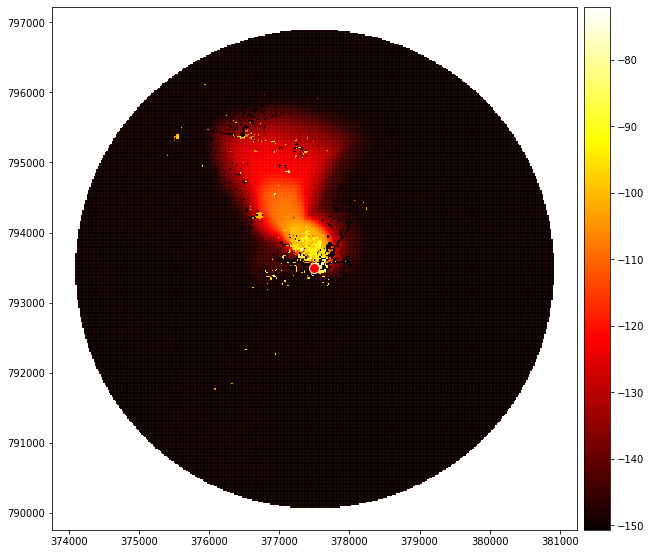

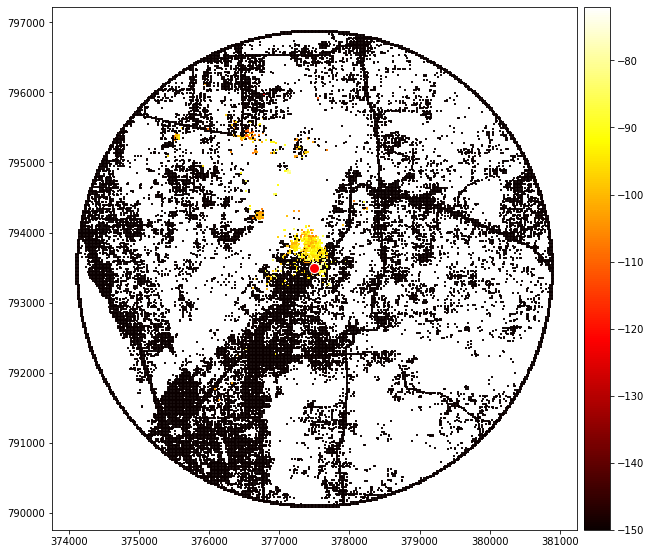

cell name:  AASL-GM0001-H_1A
           gx      gy  rsrp_before        lon       lat     distance  \
0      374100  793280          NaN  79.859771  7.175262  3406.499591   
1      374100  793300          NaN  79.859771  7.175443  3405.334500   
2      374100  793320          NaN  79.859770  7.175623  3404.286511   
3      374100  793340          NaN  79.859770  7.175804  3403.355732   
4      374100  793360          NaN  79.859769  7.175985  3402.542260   
...       ...     ...          ...        ...       ...          ...   
91182  380900  793620          NaN  79.921341  7.178486  3402.427259   
91183  380900  793640          NaN  79.921341  7.178666  3403.259444   
91184  380900  793660          NaN  79.921340  7.178847  3404.208929   
91185  380900  793680          NaN  79.921340  7.179028  3405.275617   
91186  380900  793700          NaN  79.921339  7.179209  3406.459396   

       angle_rad   rsrp  
0       1.509575 -150.0  
1       1.515437 -150.0  
2       1.521303 -150.0  
3 

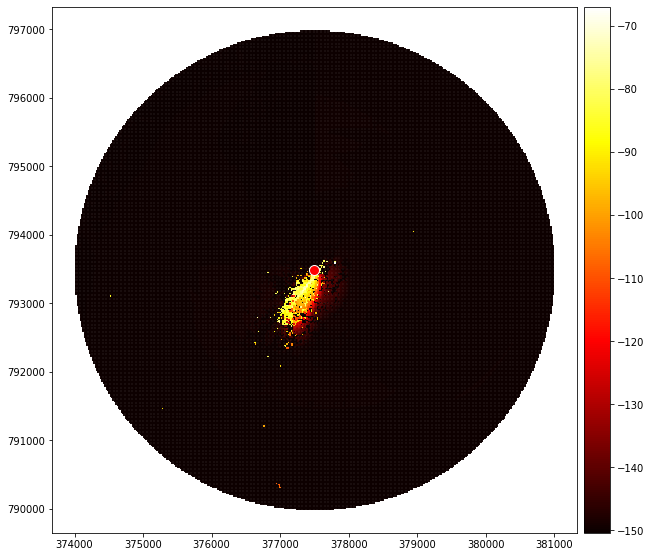

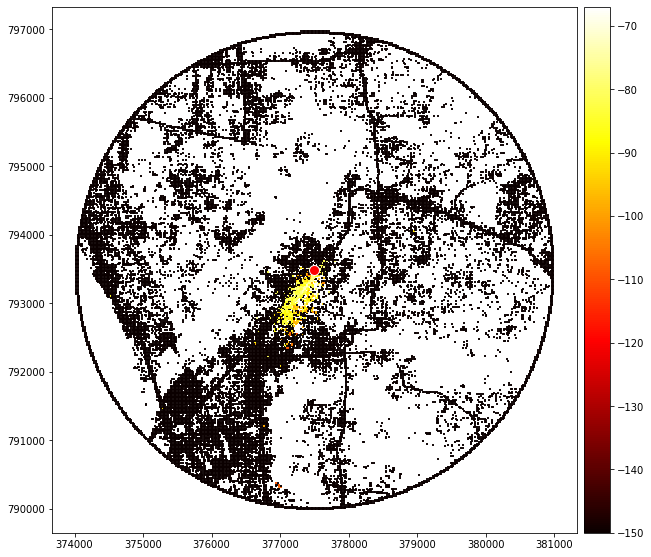

cell name:  AASL-GM0001-H_1B
           gx      gy  rsrp_before        lon       lat     distance  \
0      374020  793140          NaN  79.859050  7.173994  3497.515298   
1      374020  793160          NaN  79.859049  7.174175  3495.579616   
2      374020  793180          NaN  79.859049  7.174355  3493.757353   
3      374020  793200          NaN  79.859048  7.174536  3492.048687   
4      374020  793220          NaN  79.859048  7.174717  3490.453785   
...       ...     ...          ...        ...       ...          ...   
96085  380980  793760          NaN  79.922063  7.179753  3490.463788   
96086  380980  793780          NaN  79.922062  7.179934  3492.076896   
96087  380980  793800          NaN  79.922062  7.180115  3493.803749   
96088  380980  793820          NaN  79.922061  7.180296  3495.644179   
96089  380980  793840          NaN  79.922061  7.180477  3497.598007   

       angle_rad   rsrp  
0       4.612612 -150.0  
1       4.618305 -150.0  
2       4.624004 -150.0  
3 

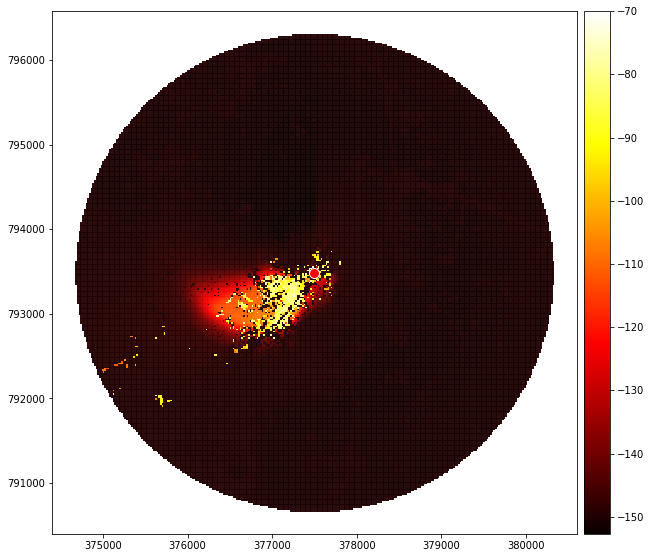

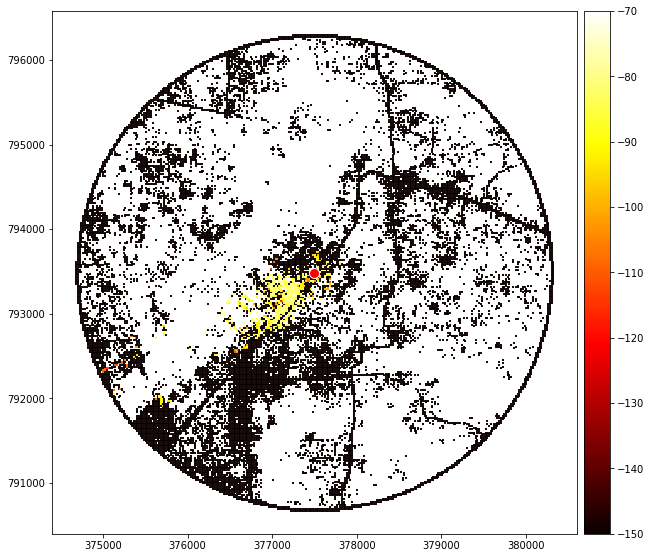

cell name:  AASL-GM0001-H_1C
           gx      gy  rsrp_before        lon       lat     distance  \
0      374680  793360          NaN  79.865021  7.175998  2823.040306   
1      374680  793380          NaN  79.865021  7.176179  2822.201297   
2      374680  793400          NaN  79.865020  7.176360  2821.503810   
3      374680  793420          NaN  79.865020  7.176541  2820.947951   
4      374680  793440          NaN  79.865020  7.176722  2820.533803   
...       ...     ...          ...        ...       ...          ...   
62627  380320  793540          NaN  79.916091  7.177750  2820.353551   
62628  380320  793560          NaN  79.916090  7.177930  2820.790269   
62629  380320  793580          NaN  79.916090  7.178111  2821.368698   
62630  380320  793600          NaN  79.916089  7.178292  2822.088752   
62631  380320  793620          NaN  79.916089  7.178473  2822.950321   

       angle_rad   rsrp  
0       4.666891 -150.0  
1       4.673971 -150.0  
2       4.681054 -150.0  
3 

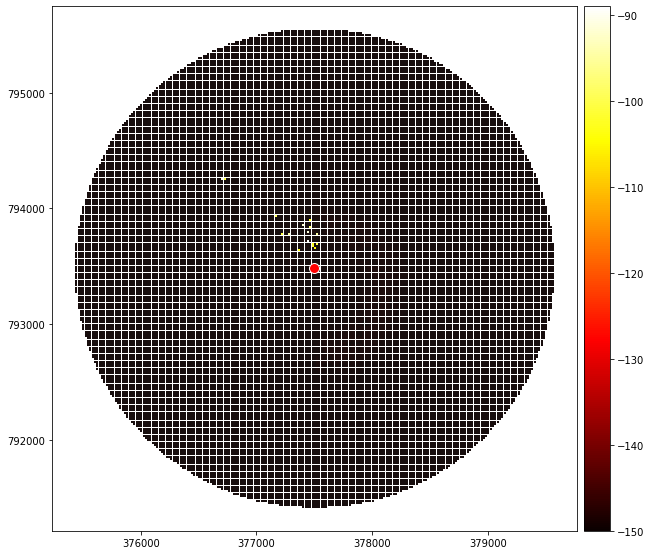

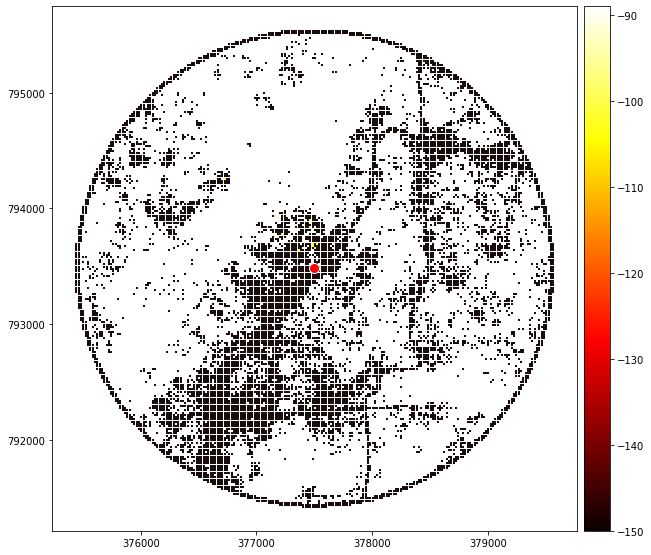

cell name:  AASL-GM0001-H_1U
           gx      gy  rsrp_before        lon       lat     distance  \
0      375440  793280          NaN  79.871905  7.175292  2070.633321   
1      375440  793300          NaN  79.871905  7.175473  2068.716012   
2      375440  793320          NaN  79.871904  7.175653  2066.990452   
3      375440  793340          NaN  79.871904  7.175834  2065.457121   
4      375440  793360          NaN  79.871903  7.176015  2064.116448   
...       ...     ...          ...        ...       ...          ...   
33687  379560  793620          NaN  79.909207  7.178457  2064.080515   
33688  379560  793640          NaN  79.909206  7.178638  2065.452000   
33689  379560  793660          NaN  79.909206  7.178819  2067.016099   
33690  379560  793680          NaN  79.909205  7.178999  2068.772376   
33691  379560  793700          NaN  79.909205  7.179180  2070.720342   

       angle_rad   rsrp  
0       1.469972 -150.0  
1       1.479591 -150.0  
2       1.489227 -150.0  
3 

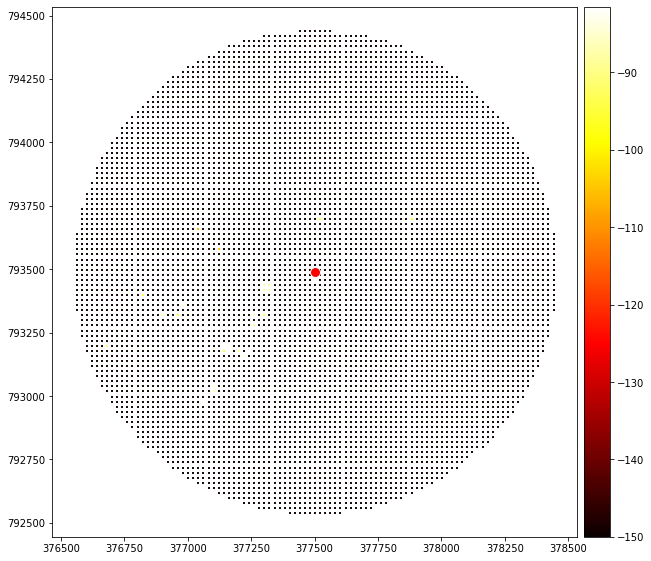

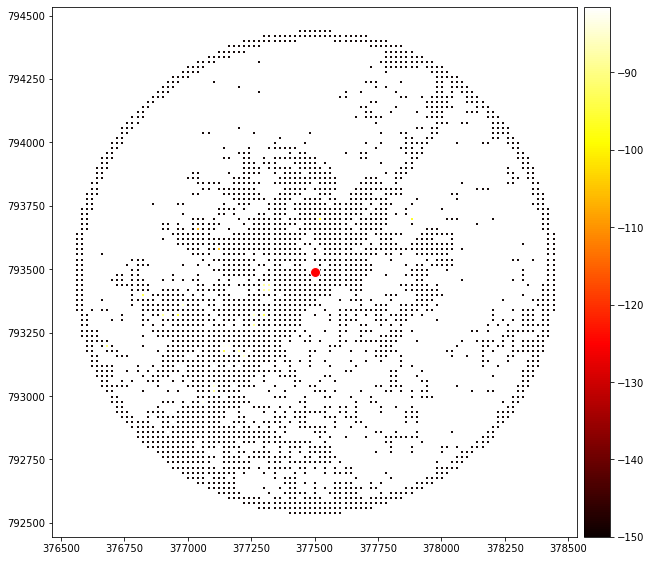

cell name:  AASL-GM0001-H_1W
          gx      gy  rsrp_before        lon       lat    distance  angle_rad  \
0     376560  793340          NaN  79.882046  7.175859  951.760509   4.555822   
1     376560  793360          NaN  79.882046  7.176040  948.847542   4.576644   
2     376560  793380          NaN  79.882045  7.176221  946.348376   4.597585   
3     376560  793400          NaN  79.882045  7.176402  944.266297   4.618628   
4     376560  793420          NaN  79.882044  7.176583  942.604068   4.639754   
...      ...     ...          ...        ...       ...         ...        ...   
7152  378440  793560          NaN  79.899066  7.177890  942.604187   1.494774   
7153  378440  793580          NaN  79.899065  7.178071  944.333757   1.473655   
7154  378440  793600          NaN  79.899065  7.178252  946.482876   1.452622   
7155  378440  793620          NaN  79.899064  7.178433  949.048695   1.431694   
7156  378440  793640          NaN  79.899064  7.178613  952.027844   1.410887   

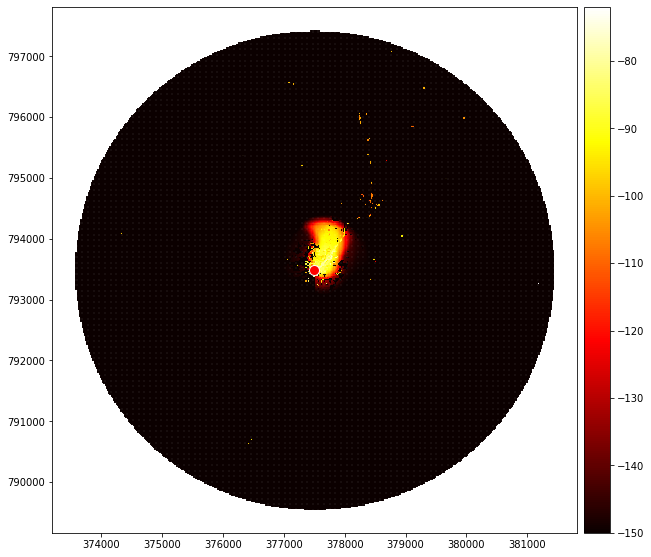

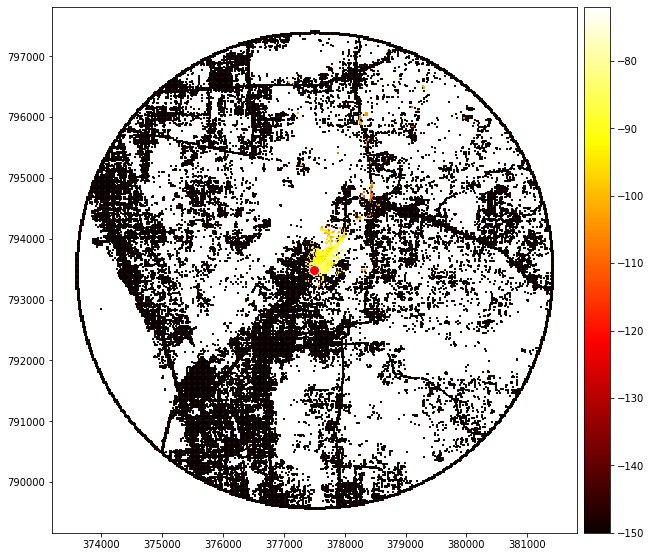

cell name:  AASL-GM0001-H_2A
            gx      gy  rsrp_before        lon       lat     distance  \
0       373580  793180          NaN  79.855064  7.174346  3932.231500   
1       373580  793200          NaN  79.855064  7.174526  3930.713442   
2       373580  793220          NaN  79.855064  7.174707  3929.296598   
3       373580  793240          NaN  79.855063  7.174888  3927.981078   
4       373580  793260          NaN  79.855063  7.175069  3926.766983   
...        ...     ...          ...        ...       ...          ...   
121453  381420  793720          NaN  79.926048  7.179401  3926.716968   
121454  381420  793740          NaN  79.926048  7.179582  3927.947268   
121455  381420  793760          NaN  79.926047  7.179763  3929.278983   
121456  381420  793780          NaN  79.926047  7.179944  3930.712012   
121457  381420  793800          NaN  79.926046  7.180125  3932.246242   

        angle_rad   rsrp  
0        1.492282 -150.0  
1        1.497354 -150.0  
2        1.50

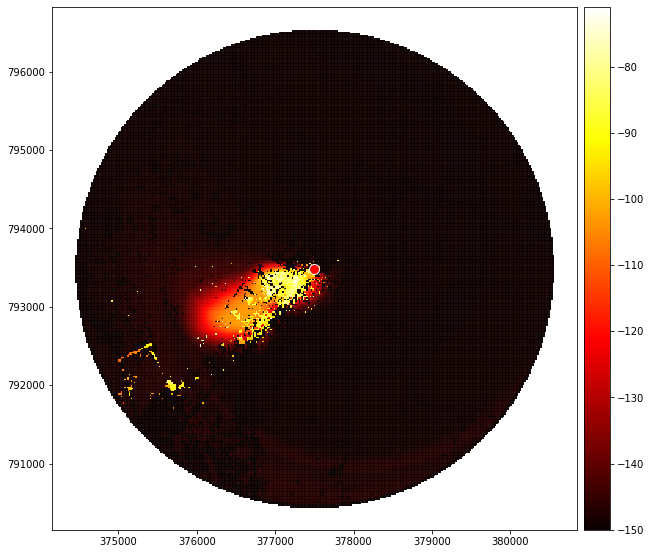

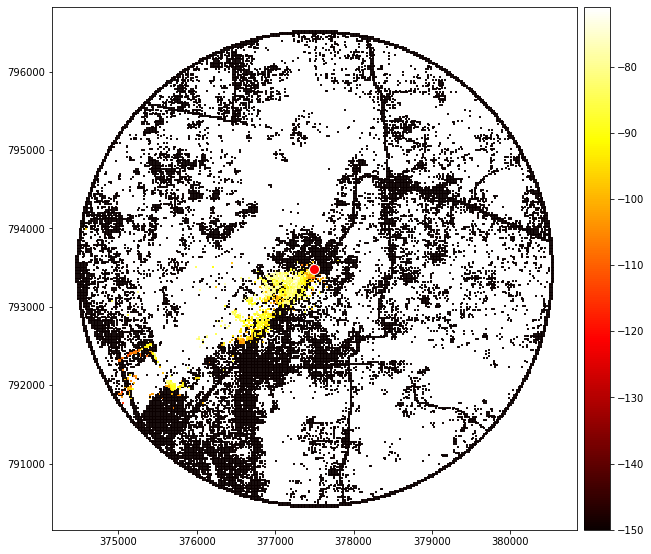

cell name:  AASL-GM0001-H_2B
           gx      gy  rsrp_before        lon       lat     distance  \
0      374460  793320          NaN  79.863030  7.175632  3044.779377   
1      374460  793340          NaN  79.863030  7.175812  3043.738662   
2      374460  793360          NaN  79.863029  7.175993  3042.829051   
3      374460  793380          NaN  79.863029  7.176174  3042.050661   
4      374460  793400          NaN  79.863028  7.176355  3041.403593   
...       ...     ...          ...        ...       ...          ...   
72822  380540  793580          NaN  79.918082  7.178116  3041.261131   
72823  380540  793600          NaN  79.918082  7.178297  3041.929134   
72824  380540  793620          NaN  79.918081  7.178478  3042.728455   
72825  380540  793640          NaN  79.918081  7.178659  3043.658989   
72826  380540  793660          NaN  79.918080  7.178840  3044.720616   

       angle_rad   rsrp  
0       4.657054 -150.0  
1       4.663615 -150.0  
2       4.670180 -150.0  
3 

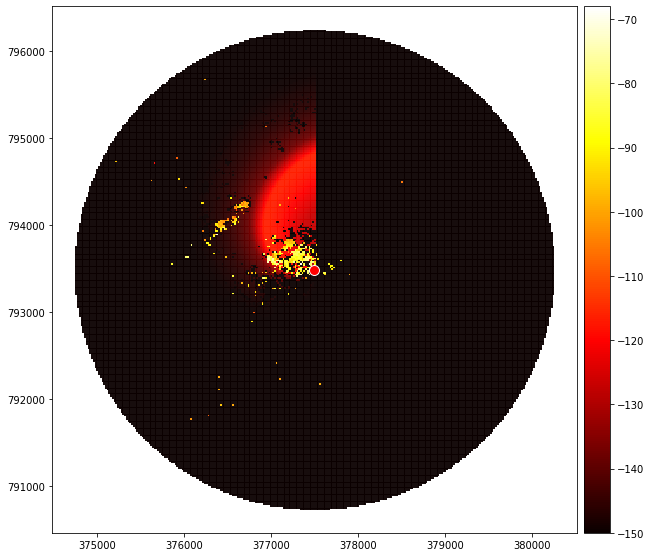

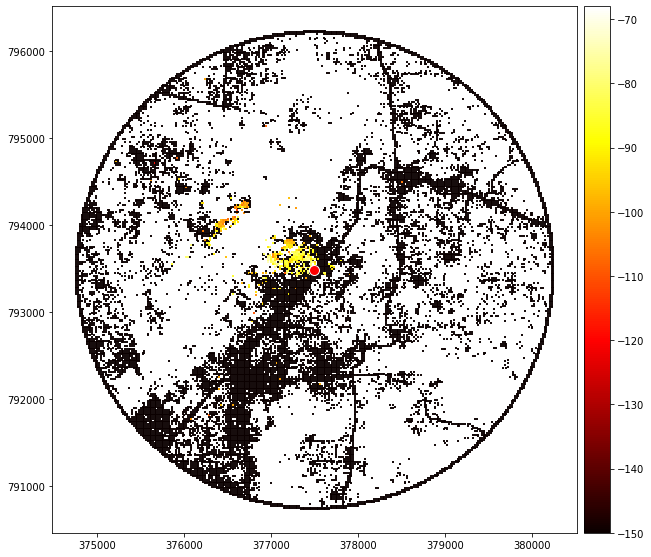

cell name:  AASL-GM0001-H_2C
           gx      gy  rsrp_before        lon       lat     distance  \
0      374760  793220          NaN  79.865749  7.174734  2753.233100   
1      374760  793240          NaN  79.865748  7.174915  2751.355319   
2      374760  793260          NaN  79.865748  7.175096  2749.621735   
3      374760  793280          NaN  79.865748  7.175276  2748.032619   
4      374760  793300          NaN  79.865747  7.175457  2746.588223   
...       ...     ...          ...        ...       ...          ...   
59587  380240  793680          NaN  79.915363  7.179014  2746.572085   
59588  380240  793700          NaN  79.915363  7.179195  2748.039630   
59589  380240  793720          NaN  79.915362  7.179376  2749.651869   
59590  380240  793740          NaN  79.915362  7.179557  2751.408547   
59591  380240  793760          NaN  79.915361  7.179738  2753.309387   

       angle_rad   rsrp  
0       4.614749 -150.0  
1       4.621984 -150.0  
2       4.629228 -150.0  
3 

,Cell Name,Raw Cell_Azim,Predicted Azimuth
0,AASL-GM0001-H_1A,5.0,10.0
1,AASL-GM0001-H_1B,230.0,226.0
2,AASL-GM0001-H_1C,260.0,240.0
3,AASL-GM0001-H_1U,5.0,10.0
4,AASL-GM0001-H_1W,260.0,264.0
5,AASL-GM0001-H_2A,5.0,58.0
6,AASL-GM0001-H_2B,230.0,248.0
7,AASL-GM0001-H_2C,260.0,322.0


In [27]:
final_df = pd.DataFrame(columns = ['Cell Name', 'Raw Cell_Azim', 'Predicted Azimuth'])

for cell_name in cell_names[:8]:

  # Take Cell Locations
  cell_lon=df_cells[df_cells["cell_name"]==cell_name].reset_index().loc[0,"cell_lon"]
  cell_lat=df_cells[df_cells["cell_name"]==cell_name].reset_index().loc[0,"cell_lat"]

  # Cell Location in Meters
  transformer4326to32644 = Transformer.from_crs("epsg:4326", "epsg:32644")
  point = geometry.point.Point(transformer4326to32644.transform(cell_lat, cell_lon ))
  cell_x,cell_y=point.x,point.y
  

  # Filter the columns which we need
  df1=df_mdt[df_mdt["cell_name"]==cell_name].reset_index().drop(["index"],axis=1)
  df1= df1[["gx","gy","lon","lat","rsrp","x","y"]]
  

  # Group by gx and gy
  df2= df1.groupby(["gx","gy"]).mean("rsrp").reset_index()


  # calculate distanbce of selected points and cells
  df2=df2.apply(lambda row: insert_bearing_and_distance_to_dataframe(row,cell_lon,cell_lat), axis=1)


  # Find min max points of longitude and latitude points
  max_r=max(df2["distance"]) #radius in km
  print(max_r)
  _,min_lon=get_point_from_bearing(cell_lat, cell_lon,270,max_r)
  max_lat,_=get_point_from_bearing(cell_lat, cell_lon,0,max_r)
  _,max_lon=get_point_from_bearing(cell_lat, cell_lon,90,max_r)
  min_lat,_=get_point_from_bearing(cell_lat, cell_lon,180,max_r)
  #0.0001° = 11.1 m
  min_lon-=0.0002
  max_lat+=0.0002
  max_lon+=0.0002
  min_lat-=0.0002
  #print(min_lon,max_lat,max_lon,min_lat)


  df_limits = pd.DataFrame({'point':['min','max'],'lat':[min_lat,max_lat],'lon':[min_lon,max_lon]})

  geom = [Point(xy) for xy in zip(df_limits.lon, df_limits.lat)]
  gdf_limits = gpd.GeoDataFrame(df_limits, crs="EPSG:4326", geometry=geom)
  gdf_limits.to_crs(crs="epsg:32644" , inplace= True )
  df_limits['x']=gdf_limits['geometry'].x
  df_limits['y']=gdf_limits['geometry'].y
  df_limits['gx']=df_limits['x'].apply(custom_round)
  df_limits['gy']=df_limits['y'].apply(custom_round)

  minx=df_limits[df_limits['point']=='min']['gx'][0]
  miny=df_limits[df_limits['point']=='min']['gy'][0]
  maxx=df_limits[df_limits['point']=='max']['gx'][1]
  maxy=df_limits[df_limits['point']=='max']['gy'][1]
  #print(df_limits)


  # Take all points of covering in 20 meters points.
  all_list = []
  for x in range(minx, maxx+1,20):
      for y in range(miny, maxy+1,20):
          all_list.append([x,y]) 

  df_all_points=pd.DataFrame(all_list,columns=["x","y"])


  # Merge gx gy values with that points
  df3=df_all_points.merge(df2,left_on=['x','y'],right_on=['gx','gy'], how='left')
  df3=df3[["x_x","y_x","rsrp"]].reset_index().drop(["index"],axis=1)
  df3.columns=["gx","gy","rsrp_before"]


  # Take meter values of that lon lat points
  geom = [Point(xy) for xy in zip(df3.gx, df3.gy)]
  df4 = gpd.GeoDataFrame(df3, crs="EPSG:32644", geometry=geom)
  df4.to_crs(crs="epsg:4326" , inplace= True )
  df3['lon']=df4['geometry'].x
  df3['lat']=df4['geometry'].y
  df3.drop('geometry', axis=1,inplace=True)



  # Define Methods to find cartician distance, angle 
  import math
  def cartician_distance(x1,y1,x2,y2):
  #     return math.sqrt(math.pow(x1-x2,2)+math.pow(y1-y2,2)) #2.25 ms 
      return ((x1-x2)**2+(y1-y2)**2)**0.5

  def cartician_angle(x,y,center_x,center_y):
      delta_x = x - center_x
      delta_y = y - center_y
      theta_radians = math.atan2(delta_x, delta_y)
      return theta_radians


  def apply_cartician_dist_andgle(row,center_x,center_y):
      row["distance"]=cartician_distance(row["gx"],row["gy"],center_x,center_y)
      row["angle_rad"]=cartician_angle(row["gx"],row["gy"],center_x,center_y)
      return row

  df4 = df3.apply(lambda row: apply_cartician_dist_andgle(row,cell_x,cell_y), axis=1)
  

  #Take all angle to 1 scale
  def convert_to_single_scale(row):
    if(row['angle_rad']<0):
      row['angle_rad']=row['angle_rad']+6.28319
    return row  

  df4 = df4.apply(lambda row: convert_to_single_scale(row), axis=1) 

  #Rotate Points by 180 Degrees , 
  dx=df_cells[df_cells['cell_name']==cell_name][['cell_name','cell_lon','cell_lat','cell_azimuth'	]]
  dx=dx.reset_index()
  cell_azimuth = math.radians(dx['cell_azimuth'][0])

  def rotate_angle(row):
    if(row['angle_rad'] +  3.14159 < 6.28319):
      row['angle_rad']=row['angle_rad']+ 3.14159
    else:
      row['angle_rad']=row['angle_rad']+ 3.14159-6.28319
    return row  



  if ( dx['cell_azimuth'][0]<60 or dx['cell_azimuth'][0]>300 ):
    df4 = df4.apply(lambda row: rotate_angle(row), axis=1) 


  ###### Replace with RSRP Values  ######
  df5=df4[df4["distance"]<=max_r*1000].reset_index().drop(["index"],axis=1)
  df5["gx"]=df5["gx"].astype('int64')
  df5["gy"]=df5["gy"].astype('int64')


  #detecting zero coverage areas using other cells' mdt points
  arr_with_other_mdt=~df5.merge(df_mdt[df_mdt["count"]>10], on=['gx','gy'], how='left').groupby(['gx','gy']).mean().reset_index()["rsrp"].isna()

  df5["rsrp"] = np.where(arr_with_other_mdt, -150,np.nan)


  #current cell data
  df5["rsrp"] = np.where(df5["rsrp_before"].isna(),df5["rsrp"], df5["rsrp_before"])


  #apply edge
  df5["rsrp"] = np.where(df5["distance"]>(max_r-0.04)*1000, -150, df5["rsrp"])

  # print(df5)


  ### Create Training df
  df_training=df5[~df5["rsrp"].isna()].reset_index().drop(["index"],axis=1)
  #
  df_training["theta_n"]=normalize_col(df_training["angle_rad"])
  df_training["r_n"]=normalize_col(df_training["distance"])
  df_training["rsrp_n"]=normalize_col(df_training["rsrp"])
  df_training


  #ANN
  dataset=df_training[["theta_n","r_n","rsrp_n"]].values
  # first neural network with keras tutorial
  # split into input (X) and output (y) variables
  X = dataset[:,0:2]
  y = dataset[:,2]
  model = Sequential()
  model.add(Dense(2, input_dim=2, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(30, activation='relu'))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 
  #add validation loss
  #hyper parameter tuning tools
  #

  df_pred=df5[df5["rsrp"].isna()].reset_index()

  #print(len(df_pred))
  #check if the predication is needed
  if(len(df_pred)>0):
      model.fit(X, y, epochs=20, batch_size=10) #, validation_split=0.1

        

##############
  import pickle
  # save the model to disk
  with open('model_'+cell_name ,'wb') as f:
    pickle.dump(model,f)

  # load the model from disk
  with open('model_'+cell_name ,'rb') as f:
    mp = pickle.load(f)
        

##############
  df_pred=df5[df5["rsrp"].isna()].reset_index()

  df_pred=df_pred.drop(["index"],axis=1)
  df_pred["theta_n"]=normalize_col(df_pred["angle_rad"])
  df_pred["r_n"]=normalize_col(df_pred["distance"])
  df_pred["rsrp_n"]=model.predict(df_pred[["theta_n","r_n"]].values)

  rsrp_max=max(df_training["rsrp"])
  rsrp_min=min(df_training["rsrp"])
  #print(rsrp_max,rsrp_min)


  df_pred["rsrp"]=from_normalized(df_pred["rsrp_n"],rsrp_max,rsrp_min)

  df_result=df_training.reset_index().append(df_pred,sort=False)
  #         df_result.drop(["index"],axis=1).to_csv("Result_"+cell_name+".csv",index=False)
  plot_df(df_result,cell=cell_name,marker_size=1) 

  # Unfilled ploted df
  plot_df(df5,cell=cell_name,marker_size=1) 

  print("cell name: ",cell_name)
  print(df5)



  df1=df_mdt[df_mdt["cell_name"]==cell_name]
  df1=df5
  user_latitude=df1["lat"].to_numpy()
  user_longitude=df1["lon"].to_numpy()
  MDT_rsrp=df1["rsrp"].to_numpy()

  
  df2=df_cells[df_cells["cell_name"]==cell_name]

  known_az= df2['cell_azimuth'].to_numpy()[0]

  bts_logitute=df2["cell_lon"].to_numpy()[0]
  bts_latitude=df2["cell_lat"].to_numpy()[0]


  # [predic_rsrp_t, predic_rsrq_t]=calculate_antenna_azimuth_prediction(user_longitude,user_latitude,bts_logitute,bts_latitude,MDT_rsrp+140,np.array([]))
  # print(cell_name, " -> " , known_az," Predicted Azimuth --> ",predic_rsrp_t)
  

  dfa=df_mdt[df_mdt["cell_name"]==cell_name]
  user_latitude=dfa["lat"].to_numpy()
  user_longitude=dfa["lon"].to_numpy()
  MDT_rsrp=dfa["rsrp"].to_numpy()

  
  dfb=df_cells[df_cells["cell_name"]==cell_name]

  known_az= df2['cell_azimuth'].to_numpy()[0]

  bts_logitute=df2["cell_lon"].to_numpy()[0]
  bts_latitude=df2["cell_lat"].to_numpy()[0]


  [predic_rsrp_t, predic_rsrq_t]=calculate_antenna_azimuth_prediction(user_longitude,user_latitude,bts_logitute,bts_latitude,MDT_rsrp+140,np.array([]))
  print(cell_name, " -> " , known_az," Predicted Azimuth --> ",predic_rsrp_t)

  l1 = [cell_name, known_az , predic_rsrp_t]
  df_length = len(final_df)
  final_df.loc[df_length] = l1
  

final_df
